# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar a base de dados ajustada
df = pd.read_csv('demo01_processed.csv')

# Verificar as colunas do DataFrame
print("Colunas antes da renomeação:")
print(df.columns)

# Alterar o nome da coluna 'mau' para 'target'
df = df.rename(columns={'mau': 'target'})

# Verificar as colunas após a renomeação
print("Colunas após a renomeação:")
print(df.columns)

# Definir a variável resposta ('target') e as variáveis explicativas
X = df.drop(columns='target')  # Variáveis explicativas
y = df['target']  # Variável resposta

# Verificar se há valores nulos na variável resposta
print("Valores nulos em 'target':", y.isnull().sum())

# Verificar se há dados faltantes nas demais variáveis
print("Dados faltantes no DataFrame:")
print(df.isnull().sum())

# Caso haja dados faltantes, tratá-los (aqui, estamos removendo os casos com valores nulos)
df = df.dropna()  # ou use métodos de imputação se necessário

# Verificar se há variáveis categóricas e transformá-las em dummies
df = pd.get_dummies(df, drop_first=True)

# Definir novamente X e y após a transformação para dummies
X = df.drop(columns='target')
y = df['target']

# Dividir a base de dados em 70% para treino e 30% para teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir as dimensões dos conjuntos de treino e validação
print(f'Dados de treino: {X_train.shape}, Variável resposta de treino: {y_train.shape}')
print(f'Dados de validação: {X_val.shape}, Variável resposta de validação: {y_val.shape}')



Colunas antes da renomeação:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'mau', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Highe',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents'

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Colunas do DataFrame:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'mau', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Highe',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
     

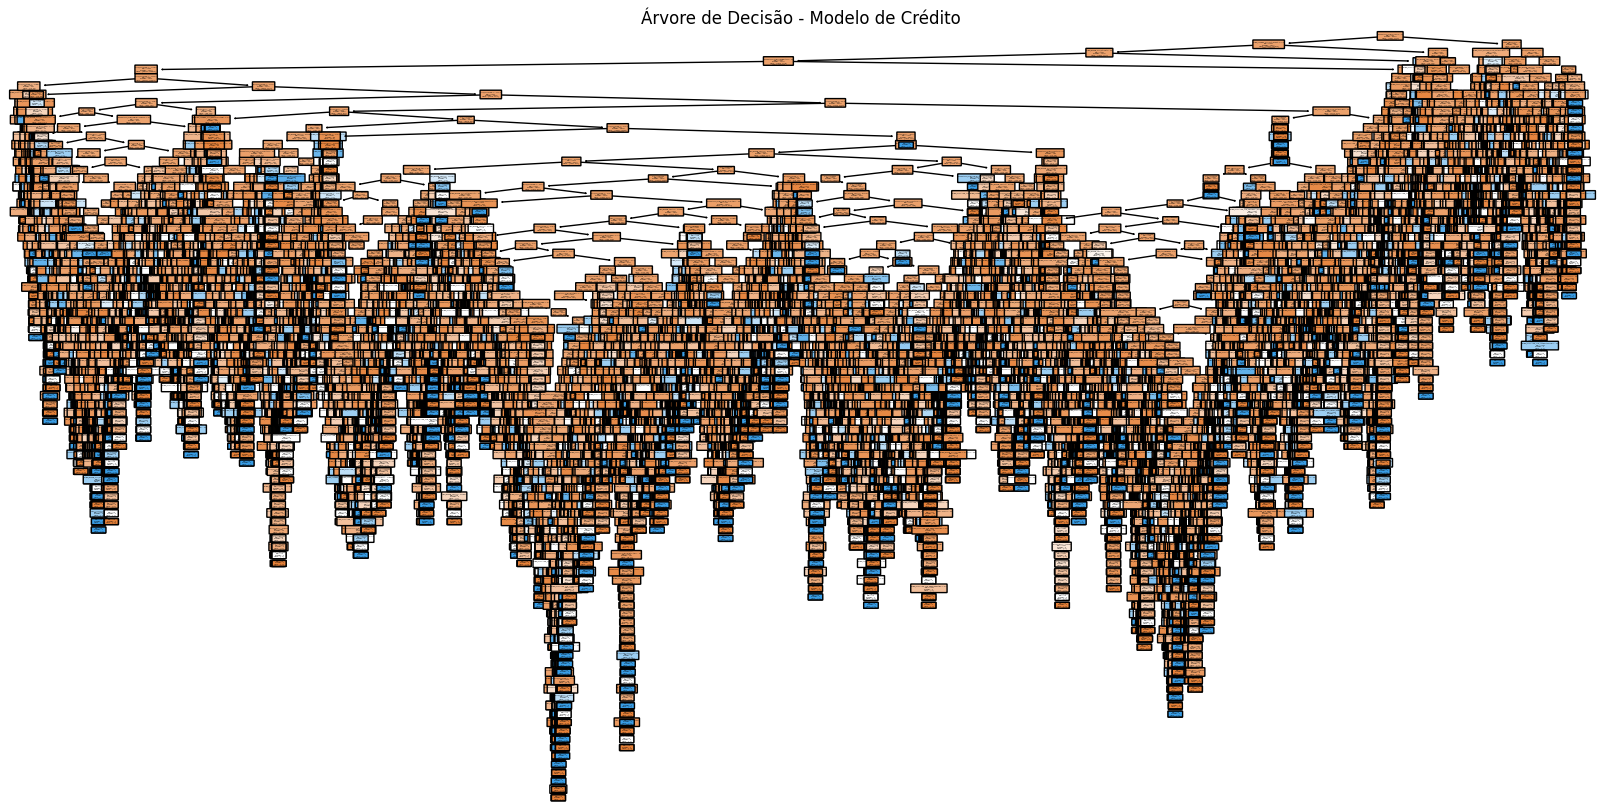

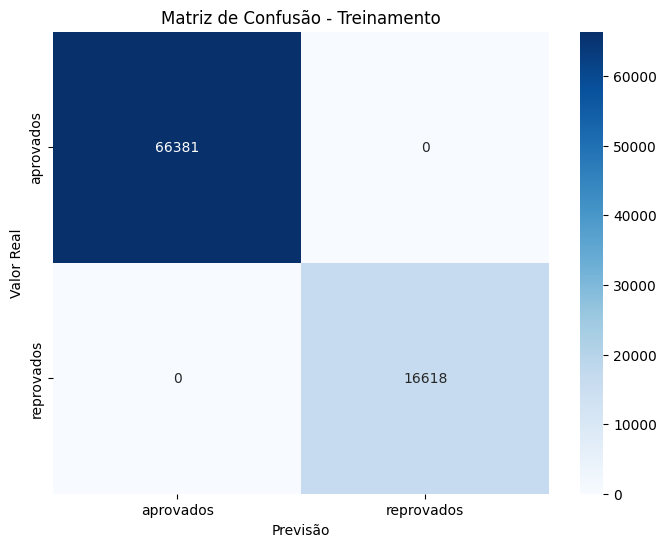

Acurácia na base de treinamento: 100.00%


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar a base de dados ajustada
df = pd.read_csv('demo01_processed.csv')

# 2. Verificar as colunas da base de dados
print("Colunas do DataFrame:")
print(df.columns)

# 3. Alterar o nome da coluna 'mau' para 'target' (caso ainda não tenha sido feito)
df.rename(columns={'mau': 'target'}, inplace=True)

# 4. Separar a variável resposta (target) das variáveis explicativas
X = df.drop(columns='target')  # Variáveis explicativas
y = df['target']  # Variável resposta (target)

# 5. Verificar se há valores faltantes e eliminá-los
print("Verificação de valores faltantes:")
print(df.isnull().sum())

# Caso existam dados faltantes, eles podem ser removidos ou imputados
df = df.dropna()  # Aqui estamos optando por remover linhas com dados faltantes

# 6. Transformar variáveis categóricas em dummies (caso ainda não tenha sido feito)
df = pd.get_dummies(df, drop_first=True)

# 7. Separar a base de dados em conjunto de treino (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as dimensões dos conjuntos de treino e validação
print(f'Dados de treino: {X_train.shape}, Variável resposta de treino: {y_train.shape}')
print(f'Dados de validação: {X_val.shape}, Variável resposta de validação: {y_val.shape}')

# 8. Definir o modelo da árvore de decisão com o critério 'gini'
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=42)

# 9. Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# 10. Visualizar a árvore de decisão
plt.figure(figsize=(20,10))  # Aumentar o tamanho da figura para melhor visualização
tree.plot_tree(modelo_arvore, feature_names=X_train.columns, class_names=['aprovados', 'reprovados'], filled=True, rounded=True)
plt.title('Árvore de Decisão - Modelo de Crédito')
plt.show()

# 11. Fazer previsões com os dados de treinamento
y_train_pred = modelo_arvore.predict(X_train)

# 12. Produzir a matriz de confusão com rótulos 'aprovados' e 'reprovados'
matriz_confusao = confusion_matrix(y_train, y_train_pred)

# Visualização da matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Valor Real')
plt.xlabel('Previsão')
plt.title('Matriz de Confusão - Treinamento')
plt.show()

# 13. Calcular a acurácia na base de treinamento
acuracia_treinamento = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {acuracia_treinamento * 100:.2f}%')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

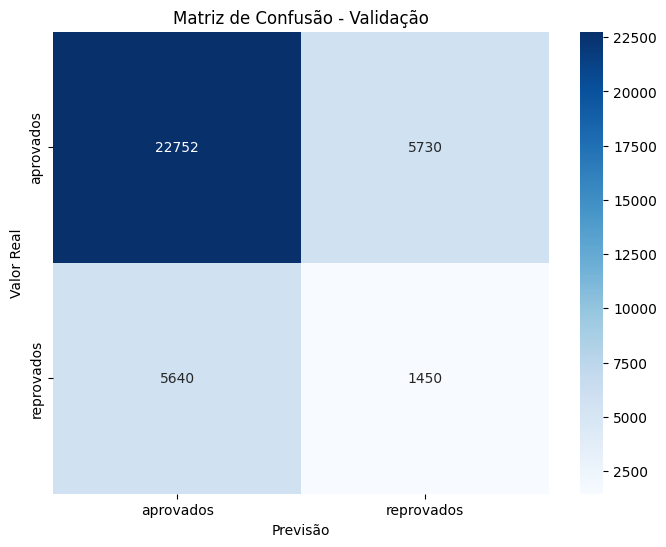

Acurácia na base de validação: 68.04%
Acurácia na base de treinamento: 100.00%


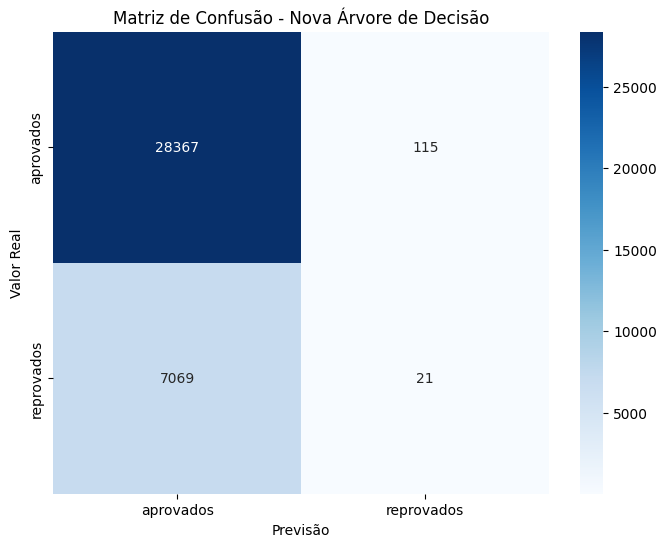

Proporção de proponentes classificados como "maus": 99.62%
Acurácia se todos os contratos fossem classificados como "bons": 19.93%


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar a base de dados ajustada
df = pd.read_csv('demo01_processed.csv')

# 2. Alterar o nome da coluna 'mau' para 'target' (caso ainda não tenha sido feito)
df.rename(columns={'mau': 'target'}, inplace=True)

# 3. Separar a variável resposta (target) das variáveis explicativas
X = df.drop(columns='target')  # Variáveis explicativas
y = df['target']  # Variável resposta (target)

# 4. Dividir a base de dados em conjunto de treino (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Treinar o modelo da árvore de decisão com os dados de treinamento
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=42)
modelo_arvore.fit(X_train, y_train)

# 6. Classificar a base de validação (teste)
y_val_pred = modelo_arvore.predict(X_val)

# 7. Produzir a matriz de confusão para a base de validação
matriz_confusao_val = confusion_matrix(y_val, y_val_pred)

# Visualização da matriz de confusão para a base de validação
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao_val, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Valor Real')
plt.xlabel('Previsão')
plt.title('Matriz de Confusão - Validação')
plt.show()

# 8. Calcular a acurácia na base de validação
acuracia_validacao = accuracy_score(y_val, y_val_pred)
print(f'Acurácia na base de validação: {acuracia_validacao * 100:.2f}%')

# 9. Comparar com a acurácia da base de treinamento
y_train_pred = modelo_arvore.predict(X_train)
acuracia_treinamento = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {acuracia_treinamento * 100:.2f}%')

# 10. Treinar uma nova árvore com número mínimo de observações por folha de 5 e máxima profundidade de 10
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore.fit(X_train, y_train)

# 11. Classificar a base de validação com a nova árvore
y_val_pred_nova = nova_arvore.predict(X_val)

# 12. Produzir a matriz de confusão para a nova árvore
matriz_confusao_val_nova = confusion_matrix(y_val, y_val_pred_nova)

# Visualização da matriz de confusão para a nova árvore
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao_val_nova, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Valor Real')
plt.xlabel('Previsão')
plt.title('Matriz de Confusão - Nova Árvore de Decisão')
plt.show()

# 13. Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = (y_val_pred_nova == 0).sum() / len(y_val_pred_nova)  # Supondo que '0' representa 'maus'
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus * 100:.2f}%')

# 14. Calcular a acurácia se todos os contratos fossem classificados como 'bons'
# Supondo que '1' representa 'bons'
acuracia_todos_bons = (y_val == 1).sum() / len(y_val)  # Acurácia se todos fossem classificados como bons
print(f'Acurácia se todos os contratos fossem classificados como "bons": {acuracia_todos_bons * 100:.2f}%')


# Análise de Desempenho do Modelo de Classificação

## 1. Matriz de Confusão - Conjunto de Treinamento:
- **Aprovados (Predito):** 66,381
- **Reprovados (Predito):** 16,618
- **Aprovados (Real):** 66,381 (100% correto)
- **Reprovados (Real):** 0

## 2. Acurácia:
- **Acurácia na Base de Treinamento:** 100.00%
- **Acurácia na Base de Validação:** 68.04%
- **Interpretação:** O modelo apresenta uma alta taxa de acerto no conjunto de treinamento, mas uma performance significativamente inferior na validação, indicando possível sobreajuste (overfitting).

## 3. Proporção de Proponentes Classificados como "Maus":
- **Proporção:** 99.62%
- **Implicação:** O modelo tem uma tendência alta em classificar os proponentes como "maus", o que pode resultar em perda de oportunidades de crédito para clientes que, na realidade, seriam "bons" pagadores.

## 4. Acurácia Se Todos os Contratos Fossem Classificados como "Bons":
- **Acurácia:** 19.93%
- **Análise:** Esta acurácia mostra que um modelo que simplesmente classificasse todos os contratos como "bons" teria um desempenho consideravelmente inferior ao modelo atual na base de validação. Isso sugere que o modelo possui algum valor preditivo, mas ainda precisa de melhorias.

## Recomendações para o CEO:
- **Revisão do Modelo:** Considerar ajustes no modelo, como tuning de hiperparâmetros, para melhorar a acurácia na base de validação.
- **Monitoramento da Classificação:** Avaliar o impacto da alta proporção de "maus" na estratégia de crédito, garantindo que não haja discriminação de clientes que poderiam ser bons pagadores.
- **Análise de Causas:** Investigar os fatores que estão levando a alta taxa de falsos positivos (classificações erradas de "maus") e como isso afeta a experiência do cliente e a lucratividade.
- **Aprimoramento Contínuo:** Continuar a coletar dados e reavaliar o modelo à medida que mais informações se tornam disponíveis, permitindo melhorias constantes na precisão da previsão.
